In [6]:
from ultralytics import YOLO
import cv2
from ultralytics.utils.plotting import Annotator  # ultralytics.yolo.utils.plotting is deprecated
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

In [2]:
model = YOLO('yolov8x.pt').to('mps')

In [86]:
img = cv2.imread("/Users/morris/Documents/Git/Hackathon2023/data/bieberach_marktplatz.png", cv2.COLOR_BGR2RGB)
results = model.predict(img)

for r in results:
        
    annotator = Annotator(img)
        
    boxes = r.boxes
    for box in boxes:
        if box.cls == 0 and box.conf > 0.3:
            b = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
            c = box.cls
            conf = round(box.conf.numpy()[0], 3)
            annotator.box_label(box=b, label=f"{model.names[int(c)]} with confidence {conf}")
          
img = annotator.result()
img = cv2.COLOR_BGR2RGB()
plt.imshow(img)


0: 384x640 13 persons, 1 car, 1 bus, 1 truck, 1 potted plant, 1 clock, 257.4ms
Speed: 1.4ms preprocess, 257.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


TypeError: 'int' object is not callable

In [61]:
def crt_htmp(img, all_bounding_boxes):

    density = np.zeros((img.shape[0], img.shape[1]), dtype=np.float32)
    for x0, y0, x1, y1 in all_bounding_boxes:
        x, y, w, h = x0, y0, x1-x0, y1-y0
        center = (int(x + w/2), int(y + h/2))
        size = (int(w/2 * 0.04), int(h/2 * 0.04))
        angle = 0
        startAngle = 0
        endAngle = 360
        cv2.ellipse(density, center, size, angle, startAngle, endAngle, (1, 1), -1)

    density = cv2.GaussianBlur(density, (21, 21), 0)
    density = cv2.normalize(density, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    heatmap = cv2.applyColorMap(density, cv2.COLORMAP_TURBO)
    img = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)
    return img

In [26]:
cap = cv2.VideoCapture("/Users/morris/Documents/Git/Hackathon2023/data/Screen Recording 2023-11-11 at 12.04.40.mov")
centers = []
image = None
while(cap.isOpened()):
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if ret == False:
        break
    if image is None:
        image = frame
    results = model.predict(frame)[0].cpu()

    for r in results:
        
        annotator = Annotator(frame)
            
        boxes = r.boxes
        for box in boxes:
            if box.cls == 0 and box.conf > 0.3:
                b = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
                c = box.cls
                conf = round(box.conf.numpy()[0], 3)
                #annotator.box_label(box=b, label=f"{model.names[int(c)]} with confidence {conf}")
                #img = annotator.result()
                #cv2.imshow('image',img)
                x0, y0, x1, y1 = b
                x, y, w, h = x0, y0, x1-x0, y1-y0
                center = (int(x + w/2), int(y1))#, int(y + h/2))
                centers.append(center)
                #print(center)


cap.release()
cv2.destroyAllWindows()

0: 320x640 26 persons, 1 bus, 69.5ms
Speed: 2.7ms preprocess, 69.5ms inference, 68.1ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 26 persons, 1 bus, 19.1ms
Speed: 2.0ms preprocess, 19.1ms inference, 3.3ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 27 persons, 1 bus, 15.7ms
Speed: 1.7ms preprocess, 15.7ms inference, 31.9ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 26 persons, 1 bus, 18.4ms
Speed: 1.8ms preprocess, 18.4ms inference, 3.1ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 26 persons, 1 bus, 16.1ms
Speed: 1.4ms preprocess, 16.1ms inference, 7.1ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 26 persons, 1 bus, 15.9ms
Speed: 1.9ms preprocess, 15.9ms inference, 6.6ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 27 persons, 1 bus, 16.1ms
Speed: 1.5ms preprocess, 16.1ms inference, 6.7ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 27 persons, 1 bus, 16.1ms
Speed: 1.7ms pre

In [23]:
densities = np.zeros((image.shape[0], image.shape[1]), dtype=np.float32)
for center in tqdm(centers):
    size = (30, 30)#(int(w/2 * 0.04), int(h/2 * 0.04))
    angle = 0
    startAngle = 0
    endAngle = 360
    density = np.zeros((image.shape[0], image.shape[1]), dtype=np.float32)
    cv2.ellipse(density, center, size, angle, startAngle, endAngle, (1, 1), -1)
    densities = densities + density
densities = cv2.GaussianBlur(densities, (21, 21), 0)
densities = cv2.normalize(densities, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
heatmap = cv2.applyColorMap(densities, cv2.COLORMAP_TURBO)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
img = cv2.addWeighted(image, 0.5, heatmap, 0.5, 0)

100%|██████████| 12693/12693 [00:08<00:00, 1573.87it/s]


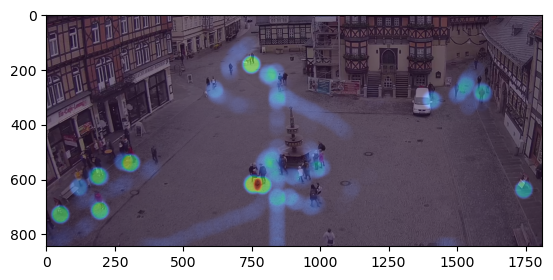

In [24]:
plt.imshow(img)

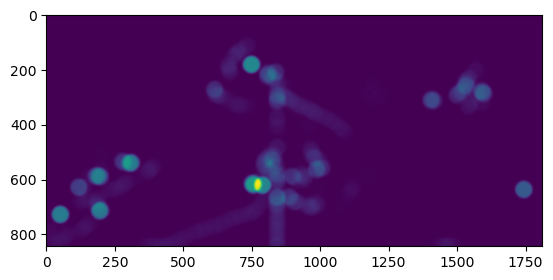

In [25]:
plt.imshow(densities)